In [1]:
import glob
import os

import matplotlib.pyplot as plt
from multiprocessing import Pool
import numpy as np
from scipy.interpolate import RectBivariateSpline
from tqdm import tqdm

%matplotlib inline

In [2]:
sid_dir = r"D:\OSI-SAF\Preprocessing_Antarctica"
lag_dir = r"D:\SIA_Weddell_Sea"

mesh_files = sorted(glob.glob(f'{lag_dir}/mesh/2015/mesh_*npz'))
print(len(mesh_files), mesh_files[0], mesh_files[-1])

# Load all inital values
mesh_init_file = r"D:\mesh_weddel_ease_25km_mmg_40_52.npz"
xc = np.load(mesh_init_file)['xc']
yc = np.load(mesh_init_file)['yc']
landmask = np.load(mesh_init_file)['landmask']
min_lm = 0.5
force = True

364 D:\SIA_Weddell_Sea/mesh/2015\mesh_20150102.npz D:\SIA_Weddell_Sea/mesh/2015\mesh_20151231.npz


In [33]:
def interpolate(mesh_file):
    basename = os.path.basename(mesh_file)
    sic_dst_file = mesh_file.replace("mesh_", "sic_").replace("/mesh/", "/sic/")
    if os.path.exists(sic_dst_file) and not force:
        return
    print(sic_dst_file)
    mesh_date = basename.split('.')[0].split('_')[-1]
    mesh_year = mesh_date[:4]
    # load mesh
    with np.load(mesh_file) as data:
        x = data['x']
        y = data['y']
        t = data['t']

    # load SIC
    file_mask = f'{sid_dir}/{mesh_year}/ice_drift_sh_ease*{mesh_date}1200.nc.npz'
    try:
        sic_src_file = glob.glob(file_mask)[0]
    except:
        raise ValueError(f'Cannot find {file_mask}')
    try:
        with np.load(sic_src_file) as data:
            cgrd = data['c']
    except:
        print(f'Cannot load c from {sic_src_file}')
        raise ValueError
    cgrd[np.isnan(cgrd)] = 0

    # interpolate SIC
    try:
        c = RectBivariateSpline(xc, yc, cgrd[::-1], kx=1, ky=1)(y[t].mean(axis=1), x[t].mean(axis=1), grid=False)
    except:
        raise ValueError(f'Fail to interpolate SIC in {mesh_file}')
    # interpolate landmask
    try:
        lm = RectBivariateSpline(xc, yc, landmask[::-1], kx=1, ky=1)(y[t].mean(axis=1), x[t].mean(axis=1), grid=False)
    except:
        raise ValueError(f'Fail to interpolate LM in {mesh_file}')

    # clear land elements
    c[lm > min_lm] = 0
    os.makedirs(os.path.split(sic_dst_file)[0], exist_ok=True)
    np.savez(sic_dst_file, c=c)

    print('t', t.shape)
    print('c', c.shape)

for mesh_file in tqdm(mesh_files, desc="Interpolating SIC"):
    interpolate(mesh_file)

Interpolating SIC:   1%|▎                                                              | 2/364 [00:00<00:24, 14.77it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150102.npz
t (8727, 3)
c (8727,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150103.npz
t (8731, 3)
c (8731,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150104.npz


Interpolating SIC:   2%|█                                                              | 6/364 [00:00<00:21, 16.55it/s]

t (8741, 3)
c (8741,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150105.npz
t (8755, 3)
c (8755,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150106.npz
t (8785, 3)
c (8785,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150107.npz
t (8791, 3)
c (8791,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150108.npz


Interpolating SIC:   3%|█▋                                                            | 10/364 [00:00<00:20, 17.36it/s]

t (8817, 3)
c (8817,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150109.npz
t (8833, 3)
c (8833,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150110.npz
t (8867, 3)
c (8867,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150111.npz
t (8887, 3)
c (8887,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150112.npz


Interpolating SIC:   4%|██▍                                                           | 14/364 [00:00<00:21, 16.43it/s]

t (8923, 3)
c (8923,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150113.npz
t (8973, 3)
c (8973,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150114.npz
t (9025, 3)
c (9025,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150115.npz
t (9065, 3)
c (9065,)


Interpolating SIC:   4%|██▋                                                           | 16/364 [00:00<00:21, 15.99it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150116.npz
t (9127, 3)
c (9127,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150117.npz
t (9135, 3)
c (9135,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150118.npz
t (9161, 3)
c (9161,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150119.npz


Interpolating SIC:   5%|███▍                                                          | 20/364 [00:01<00:20, 16.43it/s]

t (9201, 3)
c (9201,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150120.npz
t (9229, 3)
c (9229,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150121.npz
t (9287, 3)
c (9287,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150122.npz
t (9303, 3)
c (9303,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150123.npz


Interpolating SIC:   7%|████                                                          | 24/364 [00:01<00:23, 14.64it/s]

t (9327, 3)
c (9327,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150124.npz
t (9363, 3)
c (9363,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150125.npz
t (9371, 3)
c (9371,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150126.npz


Interpolating SIC:   8%|████▊                                                         | 28/364 [00:01<00:21, 15.83it/s]

t (9373, 3)
c (9373,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150127.npz
t (9383, 3)
c (9383,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150128.npz
t (9389, 3)
c (9389,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150129.npz
t (9403, 3)
c (9403,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150130.npz


Interpolating SIC:   8%|█████                                                         | 30/364 [00:01<00:21, 15.57it/s]

t (9413, 3)
c (9413,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150131.npz
t (9419, 3)
c (9419,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150201.npz
t (9431, 3)
c (9431,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150202.npz


Interpolating SIC:   9%|█████▊                                                        | 34/364 [00:02<00:22, 14.97it/s]

t (9447, 3)
c (9447,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150203.npz
t (9457, 3)
c (9457,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150204.npz
t (9465, 3)
c (9465,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150205.npz
t (9473, 3)
c (9473,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150206.npz


Interpolating SIC:  10%|██████▍                                                       | 38/364 [00:02<00:20, 15.77it/s]

t (9481, 3)
c (9481,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150207.npz
t (9485, 3)
c (9485,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150208.npz
t (9487, 3)
c (9487,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150209.npz
t (9499, 3)
c (9499,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150210.npz


Interpolating SIC:  12%|███████▏                                                      | 42/364 [00:02<00:20, 15.69it/s]

t (9523, 3)
c (9523,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150211.npz
t (9531, 3)
c (9531,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150212.npz
t (9523, 3)
c (9523,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150213.npz
t (9525, 3)
c (9525,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150214.npz


Interpolating SIC:  13%|███████▊                                                      | 46/364 [00:02<00:19, 16.06it/s]

t (9537, 3)
c (9537,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150215.npz
t (9543, 3)
c (9543,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150216.npz
t (9573, 3)
c (9573,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150217.npz
t (9567, 3)
c (9567,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150218.npz


Interpolating SIC:  14%|████████▌                                                     | 50/364 [00:03<00:19, 15.99it/s]

t (9557, 3)
c (9557,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150219.npz
t (9557, 3)
c (9557,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150220.npz
t (9563, 3)
c (9563,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150221.npz
t (9553, 3)
c (9553,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150222.npz


Interpolating SIC:  15%|█████████▏                                                    | 54/364 [00:03<00:20, 15.37it/s]

t (9559, 3)
c (9559,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150223.npz
t (9563, 3)
c (9563,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150224.npz
t (9577, 3)
c (9577,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150225.npz
t (9577, 3)
c (9577,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150226.npz


Interpolating SIC:  16%|█████████▉                                                    | 58/364 [00:03<00:19, 16.11it/s]

t (9579, 3)
c (9579,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150227.npz
t (9593, 3)
c (9593,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150228.npz
t (9617, 3)
c (9617,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150301.npz
t (9611, 3)
c (9611,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150302.npz


Interpolating SIC:  17%|██████████▌                                                   | 62/364 [00:03<00:19, 15.61it/s]

t (9627, 3)
c (9627,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150303.npz
t (9641, 3)
c (9641,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150304.npz
t (9653, 3)
c (9653,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150305.npz


Interpolating SIC:  18%|██████████▉                                                   | 64/364 [00:04<00:19, 15.11it/s]

t (9665, 3)
c (9665,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150306.npz
t (9651, 3)
c (9651,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150307.npz
t (9647, 3)
c (9647,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150308.npz


Interpolating SIC:  19%|███████████▌                                                  | 68/364 [00:04<00:20, 14.78it/s]

t (9649, 3)
c (9649,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150309.npz
t (9657, 3)
c (9657,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150310.npz
t (9665, 3)
c (9665,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150311.npz


Interpolating SIC:  20%|████████████▎                                                 | 72/364 [00:04<00:19, 14.90it/s]

t (9673, 3)
c (9673,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150312.npz
t (9677, 3)
c (9677,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150313.npz
t (9671, 3)
c (9671,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150314.npz
t (9679, 3)
c (9679,)


Interpolating SIC:  20%|████████████▌                                                 | 74/364 [00:04<00:21, 13.66it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150315.npz
t (9671, 3)
c (9671,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150316.npz
t (9685, 3)
c (9685,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150317.npz


Interpolating SIC:  21%|████████████▉                                                 | 76/364 [00:04<00:21, 13.40it/s]

t (9673, 3)
c (9673,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150318.npz
t (9693, 3)
c (9693,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150319.npz
t (9719, 3)
c (9719,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150320.npz


Interpolating SIC:  22%|█████████████▋                                                | 80/364 [00:05<00:21, 12.98it/s]

t (9717, 3)
c (9717,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150321.npz
t (9725, 3)
c (9725,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150322.npz
t (9731, 3)
c (9731,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150323.npz


Interpolating SIC:  23%|██████████████▎                                               | 84/364 [00:05<00:19, 14.00it/s]

t (9729, 3)
c (9729,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150324.npz
t (9721, 3)
c (9721,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150325.npz
t (9731, 3)
c (9731,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150326.npz
t (9755, 3)
c (9755,)


Interpolating SIC:  24%|██████████████▋                                               | 86/364 [00:05<00:18, 14.71it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150327.npz
t (9763, 3)
c (9763,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150328.npz
t (9761, 3)
c (9761,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150329.npz


Interpolating SIC:  25%|███████████████▎                                              | 90/364 [00:05<00:17, 15.46it/s]

t (9765, 3)
c (9765,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150330.npz
t (9759, 3)
c (9759,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150331.npz
t (9763, 3)
c (9763,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150401.npz
t (9771, 3)
c (9771,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150402.npz


Interpolating SIC:  26%|███████████████▊                                              | 93/364 [00:06<00:16, 16.49it/s]

t (9767, 3)
c (9767,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150403.npz
t (9791, 3)
c (9791,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150404.npz
t (9809, 3)
c (9809,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150405.npz
t (9797, 3)
c (9797,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150406.npz


Interpolating SIC:  27%|████████████████▋                                             | 98/364 [00:06<00:15, 17.65it/s]

t (9825, 3)
c (9825,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150407.npz
t (9807, 3)
c (9807,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150408.npz
t (9807, 3)
c (9807,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150409.npz
t (9803, 3)
c (9803,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150410.npz


Interpolating SIC:  27%|████████████████▊                                            | 100/364 [00:06<00:14, 17.66it/s]

t (9793, 3)
c (9793,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150411.npz
t (9799, 3)
c (9799,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150412.npz
t (9799, 3)
c (9799,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150413.npz
t (9805, 3)
c (9805,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150414.npz


Interpolating SIC:  29%|█████████████████▌                                           | 105/364 [00:06<00:14, 18.10it/s]

t (9811, 3)
c (9811,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150415.npz
t (9799, 3)
c (9799,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150416.npz
t (9807, 3)
c (9807,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150417.npz
t (9823, 3)
c (9823,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150418.npz


Interpolating SIC:  30%|██████████████████▎                                          | 109/364 [00:06<00:14, 17.60it/s]

t (9825, 3)
c (9825,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150419.npz
t (9807, 3)
c (9807,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150420.npz
t (9827, 3)
c (9827,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150421.npz
t (9847, 3)
c (9847,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150422.npz


Interpolating SIC:  31%|██████████████████▉                                          | 113/364 [00:07<00:15, 16.18it/s]

t (9853, 3)
c (9853,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150423.npz
t (9835, 3)
c (9835,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150424.npz
t (9847, 3)
c (9847,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150425.npz


Interpolating SIC:  32%|███████████████████▌                                         | 117/364 [00:07<00:15, 16.08it/s]

t (9875, 3)
c (9875,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150426.npz
t (9889, 3)
c (9889,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150427.npz
t (9923, 3)
c (9923,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150428.npz
t (9901, 3)
c (9901,)


Interpolating SIC:  33%|███████████████████▉                                         | 119/364 [00:07<00:15, 16.00it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150429.npz
t (9885, 3)
c (9885,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150430.npz
t (9879, 3)
c (9879,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150501.npz


Interpolating SIC:  34%|████████████████████▌                                        | 123/364 [00:07<00:14, 16.11it/s]

t (9909, 3)
c (9909,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150502.npz
t (9929, 3)
c (9929,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150503.npz
t (9921, 3)
c (9921,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150504.npz
t (9915, 3)
c (9915,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150505.npz


Interpolating SIC:  35%|█████████████████████▍                                       | 128/364 [00:08<00:13, 18.05it/s]

t (9931, 3)
c (9931,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150506.npz
t (9967, 3)
c (9967,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150507.npz
t (9991, 3)
c (9991,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150508.npz
t (9993, 3)
c (9993,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150509.npz
t (9967, 3)
c (9967,)


Interpolating SIC:  36%|█████████████████████▊                                       | 130/364 [00:08<00:13, 17.96it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150510.npz
t (9987, 3)
c (9987,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150511.npz
t (9987, 3)
c (9987,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150512.npz
t (10017, 3)
c (10017,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150513.npz


Interpolating SIC:  37%|██████████████████████▌                                      | 135/364 [00:08<00:12, 18.40it/s]

t (10011, 3)
c (10011,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150514.npz
t (9997, 3)
c (9997,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150515.npz
t (10003, 3)
c (10003,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150516.npz
t (10005, 3)
c (10005,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150517.npz


Interpolating SIC:  38%|██████████████████████▉                                      | 137/364 [00:08<00:12, 18.27it/s]

t (10017, 3)
c (10017,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150518.npz
t (10019, 3)
c (10019,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150519.npz
t (10051, 3)
c (10051,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150520.npz
t (10069, 3)
c (10069,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150521.npz


Interpolating SIC:  39%|███████████████████████▊                                     | 142/364 [00:08<00:12, 18.33it/s]

t (10121, 3)
c (10121,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150522.npz
t (10117, 3)
c (10117,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150523.npz
t (10105, 3)
c (10105,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150524.npz
t (10105, 3)
c (10105,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150525.npz


Interpolating SIC:  40%|████████████████████████▍                                    | 146/364 [00:09<00:11, 18.19it/s]

t (10113, 3)
c (10113,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150526.npz
t (10139, 3)
c (10139,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150527.npz
t (10129, 3)
c (10129,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150528.npz
t (10137, 3)
c (10137,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150529.npz


Interpolating SIC:  41%|█████████████████████████▏                                   | 150/364 [00:09<00:11, 18.69it/s]

t (10157, 3)
c (10157,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150530.npz
t (10209, 3)
c (10209,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150531.npz
t (10263, 3)
c (10263,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150601.npz
t (10275, 3)
c (10275,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150602.npz


Interpolating SIC:  42%|█████████████████████████▊                                   | 154/364 [00:09<00:11, 18.34it/s]

t (10263, 3)
c (10263,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150603.npz
t (10259, 3)
c (10259,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150604.npz
t (10265, 3)
c (10265,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150605.npz
t (10255, 3)
c (10255,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150606.npz


Interpolating SIC:  43%|██████████████████████████▍                                  | 158/364 [00:09<00:11, 18.22it/s]

t (10263, 3)
c (10263,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150607.npz
t (10273, 3)
c (10273,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150608.npz
t (10271, 3)
c (10271,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150609.npz
t (10257, 3)
c (10257,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150610.npz


Interpolating SIC:  45%|███████████████████████████▏                                 | 162/364 [00:09<00:11, 17.05it/s]

t (10273, 3)
c (10273,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150611.npz
t (10305, 3)
c (10305,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150612.npz
t (10297, 3)
c (10297,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150613.npz
t (10311, 3)
c (10311,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150614.npz


Interpolating SIC:  46%|███████████████████████████▊                                 | 166/364 [00:10<00:12, 16.41it/s]

t (10305, 3)
c (10305,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150615.npz
t (10347, 3)
c (10347,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150616.npz
t (10365, 3)
c (10365,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150617.npz


Interpolating SIC:  47%|████████████████████████████▍                                | 170/364 [00:10<00:11, 16.42it/s]

t (10355, 3)
c (10355,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150618.npz
t (10363, 3)
c (10363,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150619.npz
t (10423, 3)
c (10423,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150620.npz
t (10407, 3)
c (10407,)


Interpolating SIC:  47%|████████████████████████████▊                                | 172/364 [00:10<00:12, 15.57it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150621.npz
t (10373, 3)
c (10373,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150622.npz
t (10369, 3)
c (10369,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150623.npz


Interpolating SIC:  48%|█████████████████████████████▍                               | 176/364 [00:10<00:12, 15.33it/s]

t (10405, 3)
c (10405,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150624.npz
t (10401, 3)
c (10401,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150625.npz
t (10453, 3)
c (10453,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150626.npz
t (10441, 3)
c (10441,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150627.npz


Interpolating SIC:  49%|██████████████████████████████▏                              | 180/364 [00:11<00:11, 16.57it/s]

t (10457, 3)
c (10457,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150628.npz
t (10435, 3)
c (10435,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150629.npz
t (10461, 3)
c (10461,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150630.npz
t (10495, 3)
c (10495,)


Interpolating SIC:  50%|██████████████████████████████▌                              | 182/364 [00:11<00:10, 17.09it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150701.npz
t (10471, 3)
c (10471,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150702.npz
t (10543, 3)
c (10543,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150703.npz
t (10561, 3)
c (10561,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150704.npz


Interpolating SIC:  51%|███████████████████████████████▏                             | 186/364 [00:11<00:10, 17.66it/s]

t (10577, 3)
c (10577,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150705.npz
t (10581, 3)
c (10581,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150706.npz
t (10573, 3)
c (10573,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150707.npz
t (10575, 3)
c (10575,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150708.npz


Interpolating SIC:  52%|███████████████████████████████▊                             | 190/364 [00:11<00:10, 17.34it/s]

t (10587, 3)
c (10587,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150709.npz
t (10567, 3)
c (10567,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150710.npz
t (10555, 3)
c (10555,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150711.npz
t (10535, 3)
c (10535,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150712.npz


Interpolating SIC:  53%|████████████████████████████████▌                            | 194/364 [00:11<00:09, 17.24it/s]

t (10539, 3)
c (10539,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150713.npz
t (10563, 3)
c (10563,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150714.npz
t (10657, 3)
c (10657,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150715.npz
t (10663, 3)
c (10663,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150716.npz


Interpolating SIC:  54%|█████████████████████████████████▏                           | 198/364 [00:12<00:09, 17.80it/s]

t (10737, 3)
c (10737,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150717.npz
t (10731, 3)
c (10731,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150718.npz
t (10691, 3)
c (10691,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150719.npz
t (10701, 3)
c (10701,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150720.npz


Interpolating SIC:  55%|█████████████████████████████████▊                           | 202/364 [00:12<00:08, 18.62it/s]

t (10727, 3)
c (10727,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150721.npz
t (10727, 3)
c (10727,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150722.npz
t (10745, 3)
c (10745,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150723.npz
t (10801, 3)
c (10801,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150724.npz


Interpolating SIC:  57%|██████████████████████████████████▌                          | 206/364 [00:12<00:08, 18.46it/s]

t (10789, 3)
c (10789,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150725.npz
t (10787, 3)
c (10787,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150726.npz
t (10773, 3)
c (10773,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150727.npz
t (10749, 3)
c (10749,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150728.npz


Interpolating SIC:  58%|███████████████████████████████████▎                         | 211/364 [00:12<00:07, 19.15it/s]

t (10701, 3)
c (10701,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150729.npz
t (10667, 3)
c (10667,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150730.npz
t (10675, 3)
c (10675,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150731.npz
t (10665, 3)
c (10665,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150801.npz


Interpolating SIC:  59%|████████████████████████████████████                         | 215/364 [00:13<00:08, 17.53it/s]

t (10681, 3)
c (10681,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150802.npz
t (10701, 3)
c (10701,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150803.npz
t (10709, 3)
c (10709,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150804.npz
t (10729, 3)
c (10729,)


Interpolating SIC:  60%|████████████████████████████████████▎                        | 217/364 [00:13<00:09, 16.10it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150805.npz
t (10713, 3)
c (10713,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150806.npz
t (10683, 3)
c (10683,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150807.npz


Interpolating SIC:  60%|████████████████████████████████████▋                        | 219/364 [00:13<00:10, 14.16it/s]

t (10695, 3)
c (10695,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150808.npz
t (10693, 3)
c (10693,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150809.npz
t (10715, 3)
c (10715,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150810.npz


Interpolating SIC:  61%|█████████████████████████████████████▎                       | 223/364 [00:13<00:09, 14.65it/s]

t (10765, 3)
c (10765,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150811.npz
t (10793, 3)
c (10793,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150812.npz
t (10771, 3)
c (10771,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150813.npz


Interpolating SIC:  63%|██████████████████████████████████████▏                      | 228/364 [00:13<00:08, 16.10it/s]

t (10819, 3)
c (10819,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150814.npz
t (10815, 3)
c (10815,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150815.npz
t (10857, 3)
c (10857,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150816.npz
t (10863, 3)
c (10863,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150817.npz
t (10877, 3)
c (10877,)


Interpolating SIC:  63%|██████████████████████████████████████▌                      | 230/364 [00:14<00:07, 16.83it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150818.npz
t (10895, 3)
c (10895,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150819.npz
t (11001, 3)
c (11001,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150820.npz
t (11053, 3)
c (11053,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150821.npz


Interpolating SIC:  65%|███████████████████████████████████████▍                     | 235/364 [00:14<00:07, 17.72it/s]

t (11043, 3)
c (11043,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150822.npz
t (11063, 3)
c (11063,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150823.npz
t (11041, 3)
c (11041,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150824.npz
t (10985, 3)
c (10985,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150825.npz


Interpolating SIC:  65%|███████████████████████████████████████▉                     | 238/364 [00:14<00:06, 18.11it/s]

t (10977, 3)
c (10977,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150826.npz
t (10943, 3)
c (10943,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150827.npz
t (10925, 3)
c (10925,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150828.npz
t (10905, 3)
c (10905,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150829.npz


Interpolating SIC:  67%|████████████████████████████████████████▋                    | 243/364 [00:14<00:06, 18.27it/s]

t (10909, 3)
c (10909,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150830.npz
t (10899, 3)
c (10899,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150831.npz
t (10867, 3)
c (10867,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150901.npz
t (10857, 3)
c (10857,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150902.npz


Interpolating SIC:  68%|█████████████████████████████████████████▏                   | 246/364 [00:14<00:06, 18.49it/s]

t (10845, 3)
c (10845,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150903.npz
t (10853, 3)
c (10853,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150904.npz
t (10865, 3)
c (10865,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150905.npz
t (10869, 3)
c (10869,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150906.npz


Interpolating SIC:  69%|██████████████████████████████████████████                   | 251/364 [00:15<00:06, 17.62it/s]

t (10889, 3)
c (10889,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150907.npz
t (10935, 3)
c (10935,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150908.npz
t (10957, 3)
c (10957,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150909.npz
t (10949, 3)
c (10949,)


Interpolating SIC:  70%|██████████████████████████████████████████▍                  | 253/364 [00:15<00:06, 16.25it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150910.npz
t (10919, 3)
c (10919,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150911.npz
t (10879, 3)
c (10879,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150912.npz


Interpolating SIC:  70%|██████████████████████████████████████████▋                  | 255/364 [00:15<00:07, 14.91it/s]

t (10899, 3)
c (10899,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150913.npz
t (10887, 3)
c (10887,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150914.npz
t (10857, 3)
c (10857,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150915.npz


Interpolating SIC:  71%|███████████████████████████████████████████▍                 | 259/364 [00:15<00:07, 14.74it/s]

t (10885, 3)
c (10885,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150916.npz
t (10935, 3)
c (10935,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150917.npz
t (10941, 3)
c (10941,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150918.npz


Interpolating SIC:  72%|███████████████████████████████████████████▋                 | 261/364 [00:15<00:07, 14.33it/s]

t (10967, 3)
c (10967,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150919.npz
t (10929, 3)
c (10929,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150920.npz
t (10913, 3)
c (10913,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150921.npz


Interpolating SIC:  73%|████████████████████████████████████████████▍                | 265/364 [00:16<00:06, 14.45it/s]

t (10943, 3)
c (10943,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150922.npz
t (10961, 3)
c (10961,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150923.npz
t (10979, 3)
c (10979,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150924.npz


Interpolating SIC:  74%|█████████████████████████████████████████████                | 269/364 [00:16<00:06, 15.38it/s]

t (10973, 3)
c (10973,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150925.npz
t (10997, 3)
c (10997,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150926.npz
t (11039, 3)
c (11039,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150927.npz
t (11009, 3)
c (11009,)


Interpolating SIC:  74%|█████████████████████████████████████████████▍               | 271/364 [00:16<00:05, 16.12it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20150928.npz
t (10997, 3)
c (10997,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150929.npz
t (10993, 3)
c (10993,)
D:\SIA_Weddell_Sea/sic/2015\sic_20150930.npz
t (11007, 3)
c (11007,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151001.npz


Interpolating SIC:  76%|██████████████████████████████████████████████               | 275/364 [00:16<00:05, 16.90it/s]

t (10987, 3)
c (10987,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151002.npz
t (11007, 3)
c (11007,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151003.npz
t (11047, 3)
c (11047,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151004.npz
t (11041, 3)
c (11041,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151005.npz


Interpolating SIC:  77%|██████████████████████████████████████████████▊              | 279/364 [00:17<00:04, 17.52it/s]

t (11023, 3)
c (11023,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151006.npz
t (11031, 3)
c (11031,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151007.npz
t (11007, 3)
c (11007,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151008.npz
t (11001, 3)
c (11001,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151009.npz


Interpolating SIC:  78%|███████████████████████████████████████████████▌             | 284/364 [00:17<00:04, 18.19it/s]

t (11011, 3)
c (11011,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151010.npz
t (11003, 3)
c (11003,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151011.npz
t (11015, 3)
c (11015,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151012.npz
t (11051, 3)
c (11051,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151013.npz


Interpolating SIC:  79%|███████████████████████████████████████████████▉             | 286/364 [00:17<00:04, 17.90it/s]

t (11047, 3)
c (11047,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151014.npz
t (11021, 3)
c (11021,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151015.npz
t (10993, 3)
c (10993,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151016.npz


Interpolating SIC:  80%|████████████████████████████████████████████████▌            | 290/364 [00:17<00:04, 15.24it/s]

t (10999, 3)
c (10999,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151017.npz
t (10959, 3)
c (10959,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151018.npz
t (10965, 3)
c (10965,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151019.npz


Interpolating SIC:  80%|████████████████████████████████████████████████▉            | 292/364 [00:17<00:04, 14.49it/s]

t (10963, 3)
c (10963,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151020.npz
t (11015, 3)
c (11015,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151021.npz
t (10973, 3)
c (10973,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151022.npz


Interpolating SIC:  81%|█████████████████████████████████████████████████▌           | 296/364 [00:18<00:05, 12.40it/s]

t (10987, 3)
c (10987,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151023.npz
t (11005, 3)
c (11005,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151024.npz
t (10971, 3)
c (10971,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151025.npz
t (10963, 3)
c (10963,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151026.npz


Interpolating SIC:  82%|██████████████████████████████████████████████████▎          | 300/364 [00:18<00:06, 10.50it/s]

t (10981, 3)
c (10981,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151027.npz
t (10953, 3)
c (10953,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151028.npz
t (10945, 3)
c (10945,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151029.npz


Interpolating SIC:  83%|██████████████████████████████████████████████████▌          | 302/364 [00:18<00:06, 10.10it/s]

t (10965, 3)
c (10965,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151030.npz
t (10969, 3)
c (10969,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151031.npz
t (11007, 3)
c (11007,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151101.npz


Interpolating SIC:  84%|███████████████████████████████████████████████████▎         | 306/364 [00:19<00:05, 10.75it/s]

t (11059, 3)
c (11059,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151102.npz
t (11075, 3)
c (11075,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151103.npz
t (11047, 3)
c (11047,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151104.npz


Interpolating SIC:  85%|███████████████████████████████████████████████████▌         | 308/364 [00:19<00:04, 11.47it/s]

t (11039, 3)
c (11039,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151105.npz
t (11061, 3)
c (11061,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151106.npz
t (11041, 3)
c (11041,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151107.npz


Interpolating SIC:  86%|████████████████████████████████████████████████████▎        | 312/364 [00:19<00:04, 11.80it/s]

t (11059, 3)
c (11059,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151108.npz
t (11037, 3)
c (11037,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151109.npz
t (11021, 3)
c (11021,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151110.npz


Interpolating SIC:  86%|████████████████████████████████████████████████████▌        | 314/364 [00:19<00:04, 11.95it/s]

t (11013, 3)
c (11013,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151111.npz
t (11015, 3)
c (11015,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151112.npz
t (10999, 3)
c (10999,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151113.npz


Interpolating SIC:  87%|█████████████████████████████████████████████████████▎       | 318/364 [00:20<00:03, 12.19it/s]

t (10981, 3)
c (10981,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151114.npz
t (11017, 3)
c (11017,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151115.npz
t (11009, 3)
c (11009,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151116.npz


Interpolating SIC:  88%|█████████████████████████████████████████████████████▋       | 320/364 [00:20<00:03, 12.46it/s]

t (11009, 3)
c (11009,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151117.npz
t (11021, 3)
c (11021,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151118.npz
t (11019, 3)
c (11019,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151119.npz


Interpolating SIC:  89%|██████████████████████████████████████████████████████▎      | 324/364 [00:20<00:03, 12.72it/s]

t (10969, 3)
c (10969,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151120.npz
t (10973, 3)
c (10973,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151121.npz
t (10955, 3)
c (10955,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151122.npz


Interpolating SIC:  90%|██████████████████████████████████████████████████████▉      | 328/364 [00:20<00:02, 13.88it/s]

t (10941, 3)
c (10941,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151123.npz
t (10923, 3)
c (10923,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151124.npz
t (10923, 3)
c (10923,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151125.npz
t (10931, 3)
c (10931,)


Interpolating SIC:  91%|███████████████████████████████████████████████████████▎     | 330/364 [00:21<00:02, 14.96it/s]

D:\SIA_Weddell_Sea/sic/2015\sic_20151126.npz
t (10951, 3)
c (10951,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151127.npz
t (10977, 3)
c (10977,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151128.npz
t (10983, 3)
c (10983,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151129.npz


Interpolating SIC:  92%|███████████████████████████████████████████████████████▉     | 334/364 [00:21<00:02, 12.09it/s]

t (10995, 3)
c (10995,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151130.npz
t (10981, 3)
c (10981,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151201.npz
t (10981, 3)
c (10981,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151202.npz
t (11013, 3)
c (11013,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151203.npz


Interpolating SIC:  92%|████████████████████████████████████████████████████████▎    | 336/364 [00:21<00:02, 10.53it/s]

t (10973, 3)
c (10973,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151204.npz
t (10969, 3)
c (10969,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151205.npz


Interpolating SIC:  93%|████████████████████████████████████████████████████████▉    | 340/364 [00:22<00:02, 10.22it/s]

t (10973, 3)
c (10973,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151206.npz
t (10971, 3)
c (10971,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151207.npz
t (10985, 3)
c (10985,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151208.npz


Interpolating SIC:  94%|█████████████████████████████████████████████████████████▎   | 342/364 [00:22<00:02,  9.90it/s]

t (11001, 3)
c (11001,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151209.npz
t (10975, 3)
c (10975,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151210.npz


Interpolating SIC:  95%|█████████████████████████████████████████████████████████▋   | 344/364 [00:22<00:02,  9.69it/s]

t (10981, 3)
c (10981,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151211.npz
t (10991, 3)
c (10991,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151212.npz
t (11001, 3)
c (11001,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151213.npz


Interpolating SIC:  96%|██████████████████████████████████████████████████████████▎  | 348/364 [00:22<00:01, 11.54it/s]

t (11023, 3)
c (11023,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151214.npz
t (11043, 3)
c (11043,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151215.npz
t (11043, 3)
c (11043,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151216.npz


Interpolating SIC:  96%|██████████████████████████████████████████████████████████▋  | 350/364 [00:23<00:01, 10.87it/s]

t (11023, 3)
c (11023,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151217.npz
t (11027, 3)
c (11027,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151218.npz
t (11021, 3)
c (11021,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151219.npz


Interpolating SIC:  97%|███████████████████████████████████████████████████████████▎ | 354/364 [00:23<00:00, 12.94it/s]

t (11017, 3)
c (11017,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151220.npz
t (11009, 3)
c (11009,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151221.npz
t (11009, 3)
c (11009,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151222.npz
t (11009, 3)
c (11009,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151223.npz


Interpolating SIC:  98%|███████████████████████████████████████████████████████████▉ | 358/364 [00:23<00:00, 14.44it/s]

t (11007, 3)
c (11007,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151224.npz
t (11013, 3)
c (11013,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151225.npz
t (11005, 3)
c (11005,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151226.npz
t (10997, 3)
c (10997,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151227.npz


Interpolating SIC:  99%|████████████████████████████████████████████████████████████▋| 362/364 [00:23<00:00, 14.37it/s]

t (10989, 3)
c (10989,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151228.npz
t (10999, 3)
c (10999,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151229.npz
t (10969, 3)
c (10969,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151230.npz
t (10963, 3)
c (10963,)
D:\SIA_Weddell_Sea/sic/2015\sic_20151231.npz


Interpolating SIC: 100%|█████████████████████████████████████████████████████████████| 364/364 [00:23<00:00, 15.18it/s]

t (10937, 3)
c (10937,)


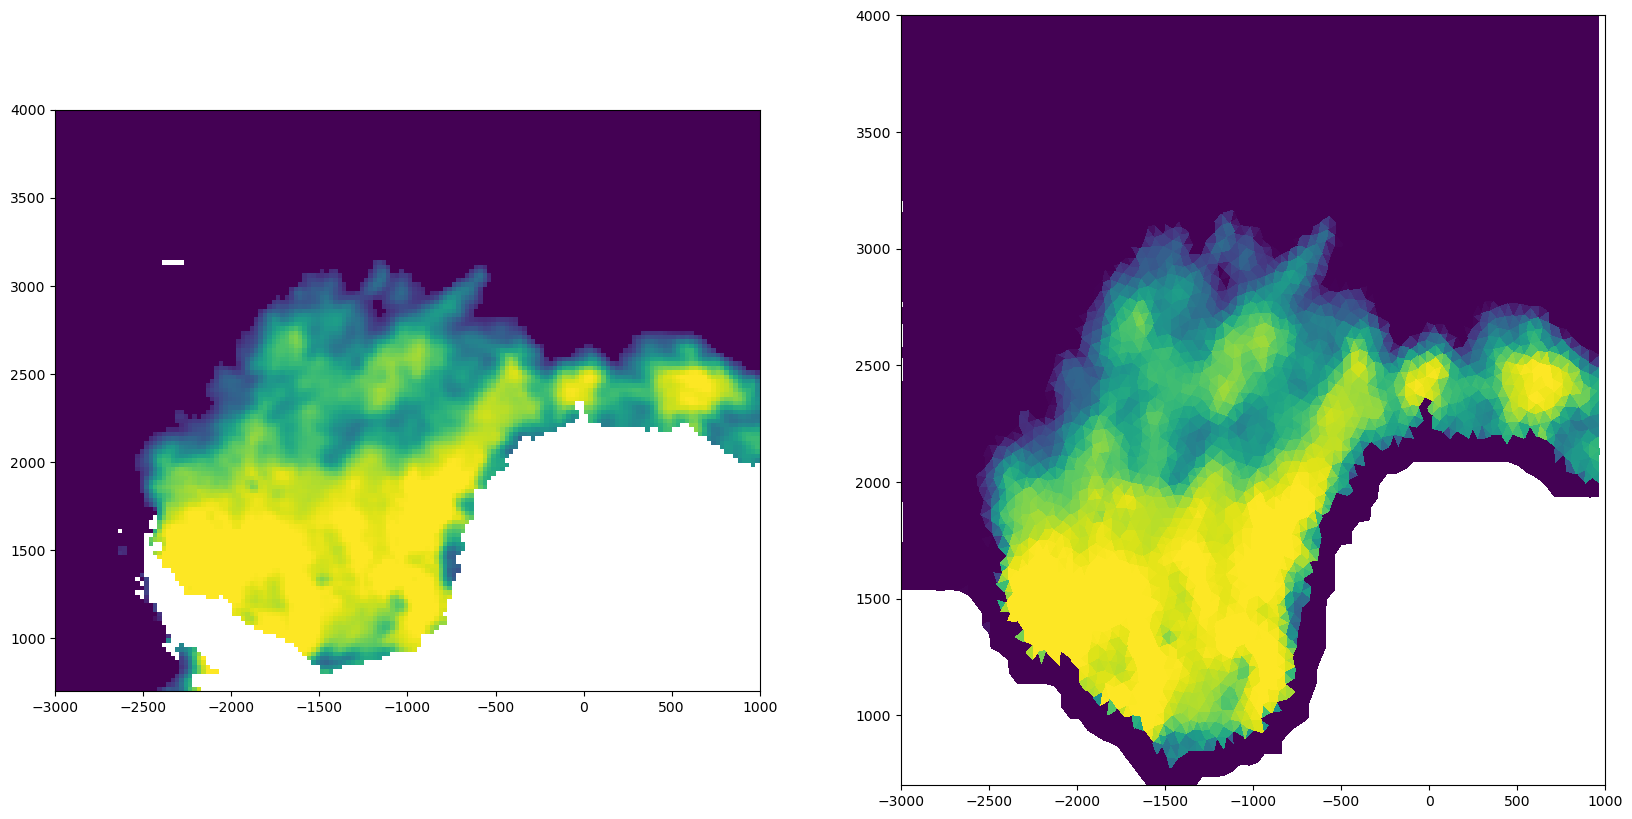

In [7]:
year = '2015'
date = '0103'
cgrd = np.load(glob.glob(f'{sid_dir}/{year}/ice_drift_sh_ease*{year}{date}1200.nc.npz')[0])['c']
c = np.load(f'{lag_dir}/sic/{year}/sic_{year}{date}.npz')['c']
x = np.load(f'{lag_dir}/mesh/{year}/mesh_{year}{date}.npz')['x']
y = np.load(f'{lag_dir}/mesh/{year}/mesh_{year}{date}.npz')['y']
t = np.load(f'{lag_dir}/mesh/{year}/mesh_{year}{date}.npz')['t']

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(cgrd, extent=[xc.min(), xc.max(), yc.min(), yc.max()])
ax[1].tripcolor(x, y, c, triangles=t)

for a in ax:
    a.set_xlim([-3000, 1000])
    a.set_ylim([700, 4000])
plt.show()




===
File: 20150102
x: (4505,)
y: (4505,)
t: (8727, 3)
c: (8727,)
===
Saved: D:\SIA_Weddell_Sea\plots\sic_20150102.png

===
File: 20150103
x: (4507,)
y: (4507,)
t: (8731, 3)
c: (8731,)
===
Saved: D:\SIA_Weddell_Sea\plots\sic_20150103.png

===
File: 20150104
x: (4512,)
y: (4512,)
t: (8741, 3)
c: (8741,)
===
Saved: D:\SIA_Weddell_Sea\plots\sic_20150104.png

===
File: 20150105
x: (4519,)
y: (4519,)
t: (8755, 3)
c: (8755,)
===
Saved: D:\SIA_Weddell_Sea\plots\sic_20150105.png

===
File: 20150106
x: (4534,)
y: (4534,)
t: (8785, 3)
c: (8785,)
===
Saved: D:\SIA_Weddell_Sea\plots\sic_20150106.png

===
File: 20150107
x: (4537,)
y: (4537,)
t: (8791, 3)
c: (8791,)
===
Saved: D:\SIA_Weddell_Sea\plots\sic_20150107.png

===
File: 20150108
x: (4550,)
y: (4550,)
t: (8817, 3)
c: (8817,)
===
Saved: D:\SIA_Weddell_Sea\plots\sic_20150108.png

===
File: 20150109
x: (4558,)
y: (4558,)
t: (8833, 3)
c: (8833,)
===
Saved: D:\SIA_Weddell_Sea\plots\sic_20150109.png

===
File: 20150110
x: (4575,)
y: (4575,)
t: (88

ValueError: The length of c must match either the number of points or the number of triangles

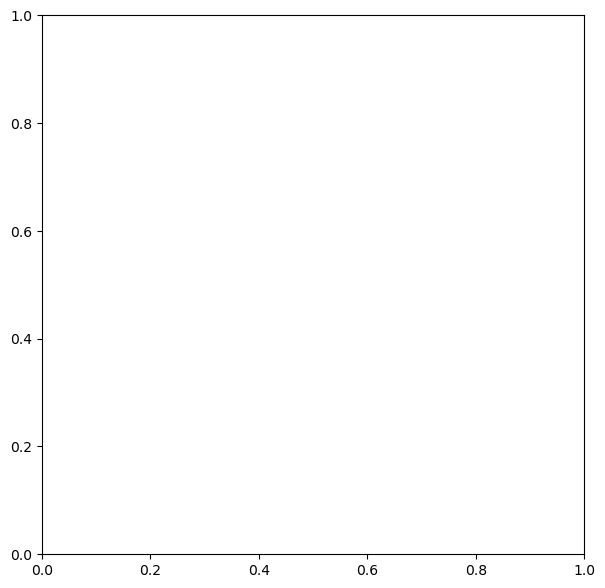

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# <-- CHANGE THESE -->
mesh_dir = r"D:\SIA_Weddell_Sea\mesh"
sic_dir  = r"D:\SIA_Weddell_Sea\sic"

output_dir = r"D:\SIA_Weddell_Sea\plots"
os.makedirs(output_dir, exist_ok=True)

# Loop through all SIC files (e.g., sic_20150101.npz)
sic_files = sorted(glob.glob(fr"{sic_dir}\2015\sic_*.npz"))

for sic_file in sic_files:

    # Extract the date (YYYYMMDD)
    fname = os.path.basename(sic_file)
    ymd = fname.split("_")[1].split(".")[0]

    # Corresponding mesh file
    mesh_file = glob.glob(fr"{mesh_dir}\{year}\mesh_{ymd}.npz")
    if len(mesh_file) == 0:
        print(f"No mesh file for {ymd}")
        continue
    mesh_file = mesh_file[0]

    # --- Load mesh ---
    with np.load(mesh_file) as m:
        x = m["x"]
        y = m["y"]
        t = m["t"]

    # --- Load SIC ---
    c = np.load(sic_file)["c"]

    print("\n===")
    print("File:", ymd)
    print("x:", x.shape)
    print("y:", y.shape)
    print("t:", t.shape)
    print("c:", c.shape)
    print("===")


    # --- Plot ---
    plt.figure(figsize=(7, 7))
    plt.tripcolor(x, y, t, c, shading="flat")
    plt.colorbar(label="SIC (%)")
    plt.title(f"SIC {ymd}")

    # Save figure
    out_png = os.path.join(output_dir, f"sic_{ymd}.png")
    plt.savefig(out_png, dpi=150)
    plt.close()

    print(f"Saved: {out_png}")


In [14]:
print("\n===")
print("File:", ymd)
print("x:", x.shape)
print("y:", y.shape)
print("t:", t.shape)
print("c:", c.shape)
print("===")


===
File: 20150303
x: (4962,)
y: (4962,)
t: (9641, 3)
c: (9577,)
===


In [28]:
mesh_0303 = r"D:\SIA_Weddell_Sea\mesh\2015\mesh_20150303.npz"
mesh_0304 = r"D:\SIA_Weddell_Sea\mesh\2015\mesh_20150304.npz"
sic_0303 = r"D:\SIA_Weddell_Sea\sic\2015\sic_20150303.npz"
sic_0304 = r"D:\SIA_Weddell_Sea\sic\2015\sic_20150304.npz"

with np.load(mesh_0303) as march03: 
        x = march03["x"]
        y = march03["y"]
        t03 = march03["t"]

with np.load(mesh_0304) as march04:
        x = march04["x"]
        y = march04["y"]
        t04 = march04["t"]

c03 = np.load(sic_0303)["c"]
c04 = np.load(sic_0304)["c"]

print(t03.shape)
print(t04.shape)
print(c03.shape)
print(c04.shape)


(9641, 3)
(9653, 3)
(9641,)
(9653,)
